In [2]:
import pandas as pd
data = pd.read_csv("data.csv")
data.shape

(77, 31)

In [3]:
X = data.iloc[:,1:30]  
y = data.iloc[:,-1]    


In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [5]:
print(model.feature_importances_)

[0.03108306 0.05012649 0.04608884 0.05278613 0.01642932 0.01799524
 0.01821781 0.02718035 0.02826132 0.02464741 0.02472841 0.02977036
 0.01870995 0.0329535  0.04091622 0.04205264 0.04072013 0.03789211
 0.04343134 0.06455337 0.05741223 0.04823963 0.02803379 0.02553241
 0.02763937 0.02665188 0.03460888 0.02511869 0.0382191 ]


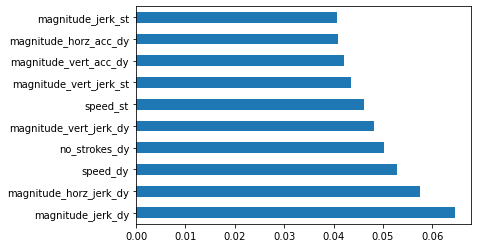

In [6]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [7]:
feat_importances.nlargest(10)


magnitude_jerk_dy         0.064553
magnitude_horz_jerk_dy    0.057412
speed_dy                  0.052786
no_strokes_dy             0.050126
magnitude_vert_jerk_dy    0.048240
speed_st                  0.046089
magnitude_vert_jerk_st    0.043431
magnitude_vert_acc_dy     0.042053
magnitude_horz_acc_dy     0.040916
magnitude_jerk_st         0.040720
dtype: float64

In [8]:
features=data[['magnitude_jerk_dy','magnitude_horz_jerk_dy','magnitude_vert_jerk_st','speed_st','speed_dy','magnitude_horz_acc_dy',
    'no_strokes_dy','magnitude_vert_acc_dy','magnitude_acc_dy','magnitude_vert_jerk_dy']]
features.head(2)

,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_vert_jerk_st,speed_st,speed_dy,magnitude_horz_acc_dy,no_strokes_dy,magnitude_vert_acc_dy,magnitude_acc_dy,magnitude_vert_jerk_dy
0,0.000010,0.000006,0.000005,0.000293,0.000431,0.000305,2.0,0.000282,0.000466,0.000006
1,0.000015,0.000010,0.000007,0.000286,0.000281,0.000510,6.0,0.000409,0.000728,0.000009


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [12]:
lr=cross_val_score(LogisticRegression(),x_train,y_train)
xgbc=cross_val_score(XGBRFClassifier(),x_train,y_train)
xgb=cross_val_score(XGBClassifier(),x_train,y_train)
svm=cross_val_score(SVC(),x_train,y_train)

dtc=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
etc=cross_val_score(ExtraTreesClassifier(),x_train,y_train)
gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[20:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
print('log reg',lr,lr.mean())
print('xgb',xgb,xgb.mean())
print('svm',svm,svm.mean())
#print('nb',nb,nb.mean)
print('dtc',dtc,dtc.mean())
print('adb',adb,adb.mean())
#print('bbc',bbc,bbc.mean())
print('etc',etc,etc.mean())
print('gbc',gbc,gbc.mean())
print('rfc',rfc,rfc.mean())

log reg [0.76923077 0.83333333 0.83333333 0.83333333 0.75      ] 0.803846153846154
xgb [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
svm [0.76923077 0.83333333 0.83333333 0.83333333 0.75      ] 0.803846153846154
dtc [0.92307692 0.91666667 0.91666667 0.91666667 1.        ] 0.9346153846153846
adb [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
etc [0.92307692 1.         0.91666667 0.91666667 1.        ] 0.9512820512820512
gbc [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
rfc [0.92307692 1.         1.         0.91666667 1.        ] 0.9679487179487178


In [14]:
model=XGBClassifier()
model.fit(x_train,y_train)

[20:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

98.36065573770492


In [16]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

87.5


In [17]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [19]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

87.5


In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

80.32786885245902


In [22]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

81.25


In [23]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)


ExtraTreesClassifier()

In [24]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [25]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

93.75


In [27]:
import numpy as np

input_data = (4852.0,3678.0,0.0,470.000000,61.833333,412.857143,185.250000,12.0,2.0,0.084891)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[1.]
The Person has Parkinsons
